<h1>
<center>Finding Regimes in Time Series</center>
</h1>

<h1>
<center>Avery Lee</center>
</h1>

# Finding regimes in time series 

Obtain the daily values of the CPI and unemployment rate from FRED up to 2021-06-01 and then convert the CPI into the yearly inflation rate `inf_data` using the following code. 

In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

unemp_data = pdr.get_data_fred('UNRATE', datetime(1945,1,1),datetime(2021,6,1))
cpi_data = pdr.get_data_fred('CPIAUCSL', datetime(1945,1,1),datetime(2021,6,1))
inf_data = (cpi_data/cpi_data.shift(12)-1).iloc[12:]
data = pd.concat([inf_data, unemp_data],axis=1)

Split the data into a training set (before Jan 2005, using `data[:"2005-1-1"]` for instance) and a test set (Jan 2005 and after). Now, ignore the time aspect of your training set by treating it as a 2-dimensional dataset. Use k-means to divide your training set into a number of clusters called **regimes**. To find the number of regimes (clusters) $k\in\{2,3,\dots,10\}$: (i) plot inertia, (ii) plot silhouette scores, (iii) plot silhouette diagrams for $k\in\{2,3,\dots,10\}$. 

There's not a clear "elbow" from the inertia plot so we can look at the silhouette plot and diagram. From the plot, it seems k = 2, 3, 8, 9 are all possible options. And looking at the diagram, k=3 seems to be a good choice as they all have similar coefficients and the coefficients are relatively high. 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

training = data[:"2005-1-1"]
testing = data["2005-1-1":]

# Standard Scaler 
scaler = StandardScaler()
train = scaler.fit_transform(training)
test = scaler.fit(testing)

# k's
ks = range(2,11)
kmc_per_k = [KMeans(n_clusters=k, random_state=42).fit(train) for k in ks]
inertias = [model.inertia_ for model in kmc_per_k]
silhouette_scores = [silhouette_score(train, model.labels_) for model in kmc_per_k]

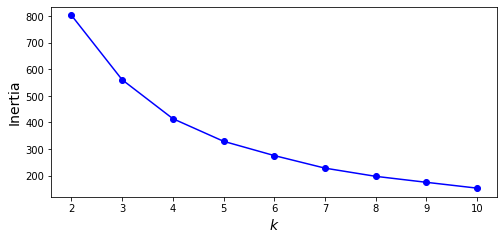

In [ ]:
import matplotlib.pyplot as plt

# Plot inertia 
plt.figure(figsize=(8, 3.5))
plt.plot(ks, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

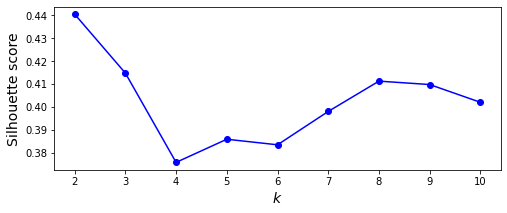

In [ ]:
# Plot silhouette scores 
plt.figure(figsize=(8, 3))
plt.plot(ks, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

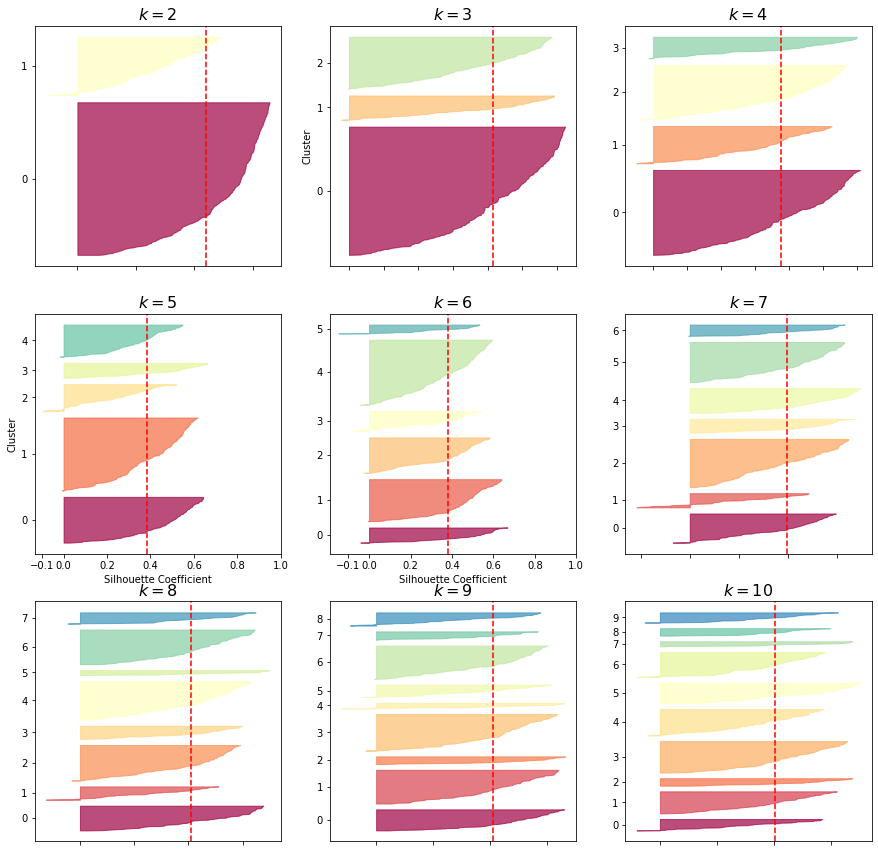

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

# Plot silhouette diagrams 
plt.figure(figsize=(15, 15))

count = 1
for k in ks:
    plt.subplot(3, 3, count)
    count += 1
    
    idx = k-2 # getting index where cluster is k 
    y_pred = kmc_per_k[idx].labels_
    silhouette_coefficients = silhouette_samples(train, y_pred)

    padding = len(train) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[idx], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Report the centroid of the regimes. For the training set, plot the inflation rate (x-axis) vs unemployment rate (y-axis) after these features have been standardized, and show the regimes and centroids in the plot. Also plot time series of the inflation rate and unemployment rate (the original series before standardization), and show the regimes on the plot. The regimes can be shown using time series (line graphs) of the centroid for each of two series for instance.

In [ ]:
# Centroids 
centroids_list = [kmc.cluster_centers_ for kmc in kmc_per_k]
centroids_list

[array([[-0.36733388, -0.42687218],
        [ 0.95700143,  1.11211437]]),
 array([[-0.42597618, -0.52331482],
        [ 2.14600121,  0.30982341],
        [ 0.0389177 ,  1.14423297]]),
 array([[-0.54171266,  0.05581654],
        [ 0.30618429,  1.36971217],
        [-0.24144812, -1.1245187 ],
        [ 2.19488377,  0.24483199]]),
 array([[-0.50234526, -1.09968501],
        [-0.60517177,  0.10313757],
        [ 0.89990984, -0.59248375],
        [ 2.43766871,  0.8728376 ],
        [ 0.20205245,  1.43117608]]),
 array([[ 2.39047801,  0.60723024],
        [-0.54581835, -1.08176031],
        [ 0.14151724,  0.87066967],
        [ 0.82157022, -0.97505097],
        [-0.633058  ,  0.0465815 ],
        [ 0.65647342,  2.43837918]]),
 array([[ 0.29486407,  0.04158166],
        [ 0.62547963,  2.01000542],
        [-0.78384526, -0.05482602],
        [ 2.4425424 ,  0.63797827],
        [-0.33600232,  0.94386693],
        [-0.47283936, -1.14053473],
        [ 1.13621528, -1.22238359]]),
 array([[-0.3274

In [ ]:
# Centroids for k=3
centroids_list[1]

array([[-0.42597618, -0.52331482],
       [ 2.14600121,  0.30982341],
       [ 0.0389177 ,  1.14423297]])

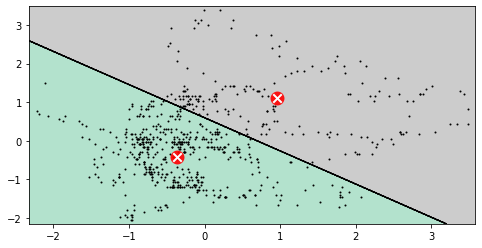

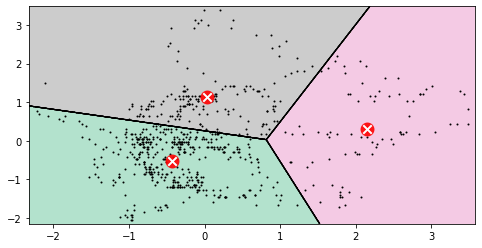

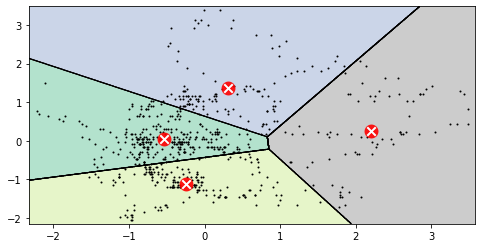

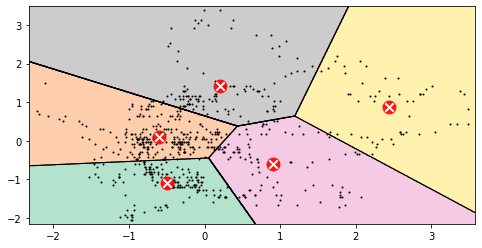

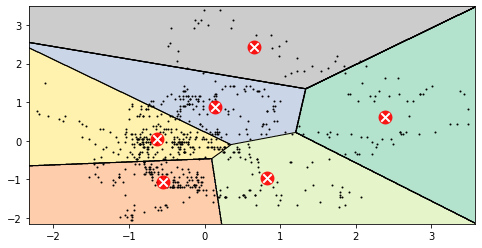

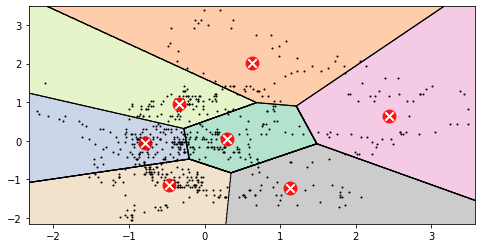

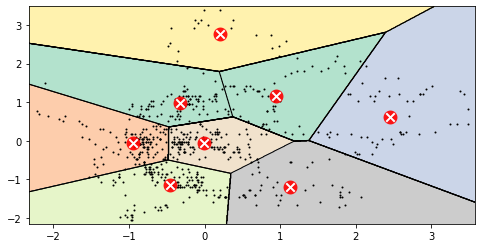

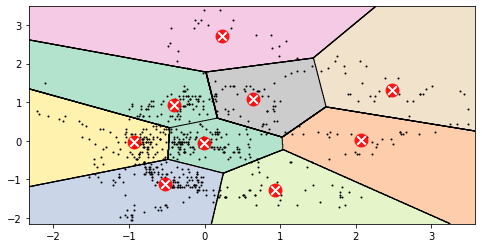

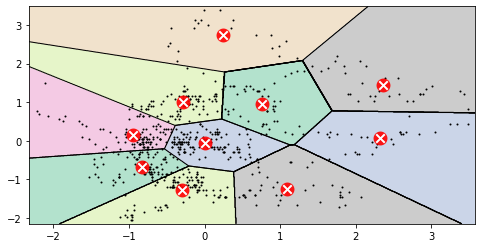

In [ ]:
# Plot inflation vs unemployment 
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='w'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(X, centroids):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    resolution = 1000
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = np.argmin(np.array([
        np.linalg.norm(np.c_[xx.ravel(), yy.ravel()]-centroid,axis=1) 
        for centroid in centroids
    ]), axis=0)

    plt.figure(figsize=(8, 4))
    plot_data(X)
    plot_centroids(centroids)
    Z = Z.reshape(xx.shape)
    plt.contourf(
        Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
        cmap="Pastel2"
    )
    plt.contour(
        Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
        linewidths=1, colors='k'
    )
    plt.show()

for centroids in centroids_list:
    plot_clusters(train, centroids)

In [ ]:
# Unscaled clusters 
best_k = 3
kmc_unscaled = KMeans(n_clusters=best_k, random_state=42).fit(training)
centroids_unscaled_train = kmc_unscaled.cluster_centers_
unscaled_pred_train = kmc_unscaled.labels_ # also the index of its centroid in centroids_unscaled_train 

centroids_CPIAUSL = [centroids_unscaled_train[i,0] for i in unscaled_pred_train]
centroids_UNRATE = [centroids_unscaled_train[i,1] for i in unscaled_pred_train]

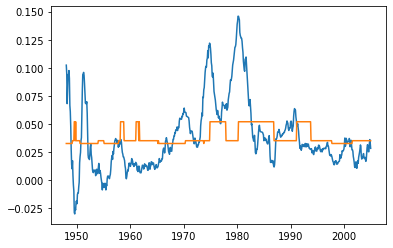

In [ ]:
# Time series plot 
plt.plot(training['CPIAUCSL'])
plt.plot(training.index, centroids_CPIAUSL)

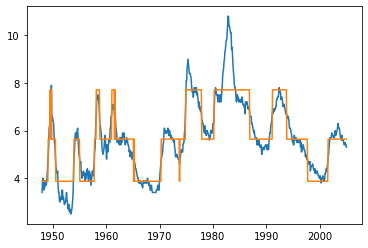

In [ ]:
plt.plot(training['UNRATE'])
plt.plot(training.index, centroids_UNRATE)

A regime-switching model is a probabilistic model that governs how regime transitions take place. A very simple regime-switching model is a Markov chain. Here, we assume that the next month's regime depends on the current regime. In other words, all we need to know are the **transition probabilities** $p_{i,j} = \mathbb{P}(X_{t+1}=j|X_t=i)$, where $X_t$ is the regime at day $t$. Using the time series of regimes in the training set, estimate these transition probabilities, as follows:
\begin{align*}
    p_{i,j} = \frac{\mathbb{P}(X_{t+1}=j \text{ and } X_t=i)}{\mathbb{P}(X_t=i)}\approx \frac{\text{number of transition from regime $i$ to $j$}}{\text{number of transition from regime $i$}}
\end{align*}
Next, let's check how good the regime switching model is. Calculate the transition probabilities using the test set. 

Note: Depending on your choice of $k$, it is possible that some $p_{i,j}$ cannot be estimated due to  having no transitions from regime $i$.

As shown in the difference table all the way below, it seems the difference of probabilities in training and testing are pretty low for all values, so it seems this method is doing a decent job. 

In [ ]:
import numpy as np 

# Test set 
unscaled_pred_test = kmc_unscaled.predict(testing)

# Transition probabilities (training)
tp_train = np.zeros((best_k,best_k)) # rows are 'from', cols are 'to' 
counts_train = [list(unscaled_pred_train[:-1]).count(i) for i in range(best_k)]

for i in range(1,len(unscaled_pred_train)):
    prev_pred = unscaled_pred_train[i-1]
    curr_pred = unscaled_pred_train[i]
    tp_train[prev_pred, curr_pred] += 1

# Transition probabilities (testing)
tp_test = np.zeros((best_k,best_k)) # rows are 'from', cols are 'to' 
counts_test = [list(unscaled_pred_test[:-1]).count(i) for i in range(best_k)]

for i in range(1,len(unscaled_pred_test)):
    prev_pred = unscaled_pred_test[i-1]
    curr_pred = unscaled_pred_test[i]
    tp_test[prev_pred, curr_pred] += 1

# Cleanup 
for i in range(best_k):
    if counts_train[i] != 0:
        tp_train[i] /= counts_train[i]
    if counts_test[i] != 0:
        tp_test[i] /= counts_test[i]

tp_train = pd.DataFrame(tp_train, index=['From '+str(i) for i in range(best_k)], columns=['To '+str(i) for i in range(best_k)])
tp_test = pd.DataFrame(tp_test, index=['From '+str(i) for i in range(best_k)], columns=['To '+str(i) for i in range(best_k)])

In [ ]:
tp_train

,To 0,To 1,To 2
From 0,0.956522,0.024845,0.018634
From 1,0.048193,0.951807,0.000000
From 2,0.035714,0.000000,0.964286


In [ ]:
tp_test

,To 0,To 1,To 2
From 0,0.918033,0.032787,0.049180
From 1,0.041096,0.958904,0.000000
From 2,0.031746,0.015873,0.952381


In [ ]:
difference = tp_test - tp_train 
difference

,To 0,To 1,To 2
From 0,-0.038489,0.007942,0.030547
From 1,-0.007097,0.007097,0.000000
From 2,-0.003968,0.015873,-0.011905
